## Model building and training

In [103]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fingerprints.get_fp import output, input
from useful_functions import plot_cluster_counts_array
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
%matplotlib inline

from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn import utils


## Importing data

In [104]:
labels_kmeans = pd.read_csv('data/labels_kmeans.csv').set_index('CID')
labels_manual = pd.read_csv('data/labels_manual.csv').set_index('CID')
labels_manual_expert = pd.read_csv('data/labels_manual_expert.csv').set_index('CID')
labels_hrc = pd.read_csv('data/labels_hrc.csv').set_index('CID')

kmeans_counts = labels_kmeans.sum().sort_values(ascending=False)
manual_counts = labels_manual.sum().sort_values(ascending=False)
manual_expert_counts = labels_manual_expert.sum().sort_values(ascending=False)
hierarchical_counts = labels_hrc.sum().sort_values(ascending=False)

print(manual_counts,manual_expert_counts)

fingerprint = input

fruity        1736
general       1287
spices        1189
sweet         1170
savoury       1136
green         1101
earthy        1050
sharp          635
artificial     247
dtype: int64 fruity     1752
savory     1136
green       917
flower      682
herbal      568
aquatic     237
woody       233
earthy      173
alcohol     149
animal       64
spices       25
dtype: int64


## Randomized labels as baseline

In [125]:
# Randomize labels by shuffling each column independently
randomized_labels = labels_kmeans.apply(np.random.permutation, axis=0)

y_rand = np.array(randomized_labels, dtype=np.float64)
X = fingerprint

X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X, y_rand, test_size=0.2, random_state=12345)
print(f"training set with standard split is {len(y_train_rand)} items long and the test set is {len(y_test_rand)} items long")

m_rf = RandomForestClassifier(n_estimators = 10, max_features=100).fit(X_train_rand, y_train_rand)
y_pred_std = m_rf.predict(X_test_rand)

print(classification_report(y_test_rand, y_pred_std, zero_division=0))

training set with standard split is 2789 items long and the test set is 698 items long
              precision    recall  f1-score   support

           0       0.35      0.14      0.20       239
           1       0.35      0.12      0.18       228
           2       0.29      0.07      0.11       167
           3       0.41      0.11      0.17       183
           4       0.34      0.21      0.26       261
           5       0.51      0.44      0.48       362
           6       0.11      0.02      0.03       111
           7       0.28      0.13      0.17       238
           8       0.26      0.07      0.11       221

   micro avg       0.39      0.18      0.24      2010
   macro avg       0.32      0.14      0.19      2010
weighted avg       0.35      0.18      0.22      2010
 samples avg       0.29      0.18      0.20      2010



## Train-test split

In [105]:
y = np.array(labels_kmeans, dtype=np.float64)
X = fingerprint
X

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [106]:
from skmultilearn.model_selection import iterative_train_test_split

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X, y, test_size=0.2, random_state=12345)
print(f"training set with standard split is {len(y_train_std)} items long and the test set is {len(y_test_std)} items long")

X_train_iter, y_train_iter, X_test_iter, y_test_iter = iterative_train_test_split(X, y, test_size = 0.2)
print(f"training set with iterative split is {len(y_train_iter)} items long and the test set is {len(y_test_iter)} items long")

training set with standard split is 2789 items long and the test set is 698 items long
training set with iterative split is 2797 items long and the test set is 690 items long


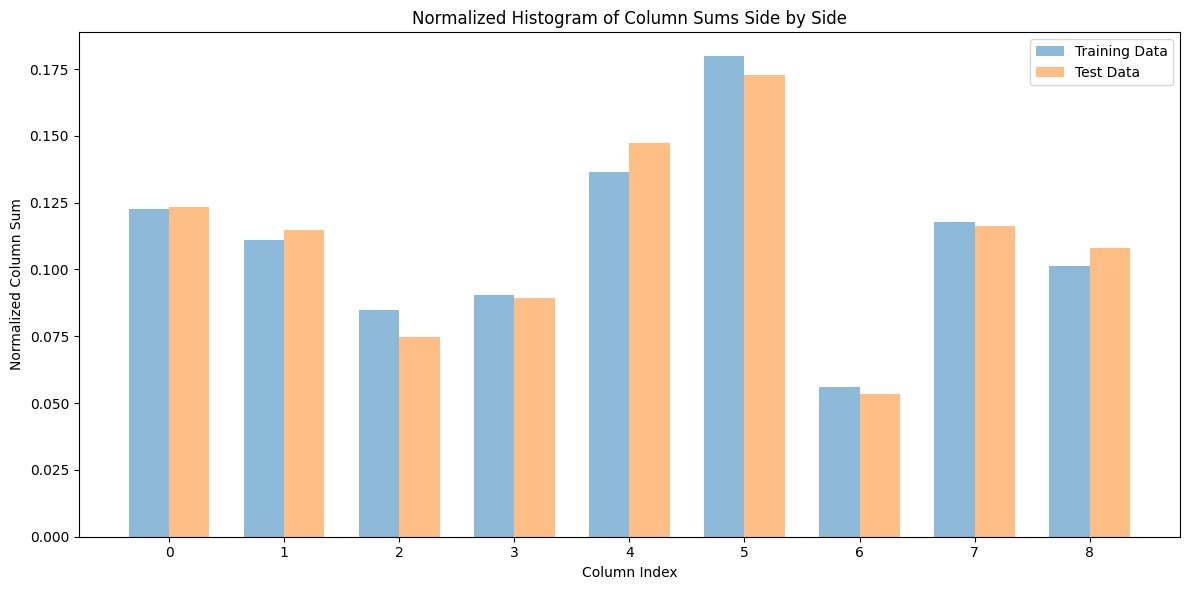

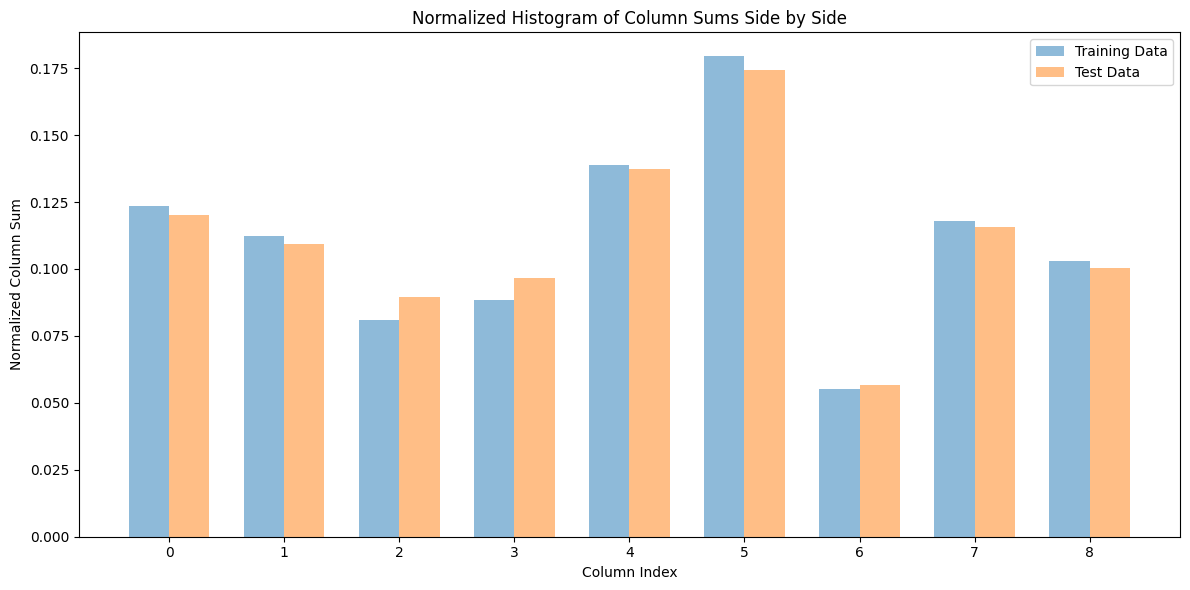

In [107]:
plot_cluster_counts_array(y_train_std, y_test_std)
plot_cluster_counts_array(y_train_iter, y_test_iter)

## Training unoptimized models

In [108]:
m_rf = RandomForestClassifier(n_estimators = 10, max_features = 1).fit(X_train_std, y_train_std)
y_pred_std = m_rf.predict(X_test_std)

print(classification_report(y_test_std, y_pred_std, zero_division=0))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67       245
           1       0.76      0.46      0.57       228
           2       0.45      0.24      0.31       148
           3       0.72      0.32      0.44       177
           4       0.80      0.54      0.64       292
           5       0.66      0.67      0.67       343
           6       0.61      0.26      0.37       106
           7       0.63      0.43      0.51       231
           8       0.72      0.39      0.50       214

   micro avg       0.69      0.48      0.56      1984
   macro avg       0.68      0.43      0.52      1984
weighted avg       0.69      0.48      0.55      1984
 samples avg       0.65      0.51      0.53      1984



In [110]:
m_rf_unoptimized = RandomForestClassifier(n_estimators = 10, max_features = 1).fit(X_train_iter, y_train_iter)
y_pred_unoptimized = m_rf_unoptimized.predict(X_test_iter)

print(classification_report(y_test_iter, y_pred_unoptimized, zero_division=0))

              precision    recall  f1-score   support

           0       0.76      0.57      0.65       244
           1       0.67      0.45      0.54       222
           2       0.55      0.17      0.26       182
           3       0.69      0.23      0.34       196
           4       0.75      0.50      0.60       279
           5       0.69      0.61      0.65       354
           6       0.62      0.25      0.36       115
           7       0.61      0.38      0.47       235
           8       0.62      0.34      0.44       204

   micro avg       0.68      0.42      0.52      2031
   macro avg       0.66      0.39      0.48      2031
weighted avg       0.67      0.42      0.51      2031
 samples avg       0.63      0.45      0.50      2031



Performance seems to be better when using the standard train test split function compared to the iterative train test function, so we will use the standard train test function 

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
print(f"training set with standard split is {len(y_train)} items long and the test set is {len(y_test)} items long")

training set with standard split is 2789 items long and the test set is 698 items long


In [112]:
print(np.sum(y_test, axis=0))
print(np.sum(y_pred_std, axis=0))


[245. 228. 148. 177. 292. 343. 106. 231. 214.]
[198. 138.  78.  78. 196. 350.  46. 158. 116.]


In [113]:
#m_rf.get_params()

## Bayesian hyperparameter optimisation

In [15]:
# functions derived from ...
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
from sklearn.metrics import make_scorer, f1_score

# inlcude max leaf nodes?
def rfc_cv(n_estimators, max_leaf_nodes, max_depth, min_samples_split, max_features,  x_data, y_targets):
    """Random Forest cross validation.

    This function will instantiate a random forest classifier with parameters
    n_estimators, min_samples_split, and max_depth. Combined with data and
    targets this will in turn be used to perform cross validation. The result
    of cross validation is returned.

    Our goal is to find combinations of n_estimators, min_samples_split, and
    max_depth that minimizes the log loss.
    """
    estimator = RandomForestClassifier(
        n_estimators=n_estimators,
        max_leaf_nodes=max_leaf_nodes,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features,
        random_state=2
    )

    multi_output_estimator = MultiOutputClassifier(estimator)
    
    cval = cross_val_score(multi_output_estimator, x_data, y_targets,
                           scoring=make_scorer(f1_score, average='samples'), cv=4)
    return cval.mean()

In [36]:

def optimize_rfc(x_data, y_targets):
    """Apply Bayesian Optimization to Random Forest parameters."""
    def rfc_crossval(n_estimators, max_leaf_nodes, max_depth, min_samples_split, max_features):
        """Wrapper of RandomForest cross validation.
        """
        return rfc_cv(
            n_estimators=int(n_estimators),
            max_leaf_nodes = int(max_leaf_nodes),
            max_depth=int(max_depth),
            min_samples_split=int(min_samples_split),
            max_features=int(max_features),
            x_data=x_data,
            y_targets=y_targets,
        )

    optimizer = BayesianOptimization(
        f=rfc_crossval,
        pbounds={
            "n_estimators": (10, 750),
            "max_leaf_nodes" : (20, 1000),
            "max_depth": (20, 100),
            "min_samples_split": (2, 25),
            "max_features": (3, 500),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)
    return optimizer.max["params"]

In [17]:
best_params_bayes = optimize_rfc(X_train, y_train)

|   iter    |  target   | max_depth | max_fe... | max_le... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.5873    | 35.32     | 312.2     | 449.0     | 20.06     | 587.2     |
| 2         | 0.5872    | 41.81     | 140.4     | 805.8     | 24.04     | 658.2     |
| 3         | 0.5852    | 48.63     | 252.0     | 689.8     | 18.39     | 284.0     |
| 4         | 0.5639    | 64.9      | 253.0     | 33.49     | 19.78     | 663.2     |
| 5         | 0.5881    | 49.19     | 308.9     | 93.87     | 10.48     | 700.5     |
| 6         | 0.5915    | 61.22     | 93.2      | 389.5     | 3.748     | 204.4     |
| 7         | 0.5896    | 50.6      | 411.3     | 416.9     | 19.22     | 584.0     |
| 8         | 0.5849    | 28.88     | 111.6     | 678.1     | 21.77     | 600.1     |
| 9         | 0.5891    | 48.69     | 406.7     | 406.3     | 13.31     | 588.8     |
| 10        | 0.5805    | 36.09     | 51.05     | 427.

## Random & Grid Search

In [115]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import randint as sp_randint
import numpy as np
import time

def optimize_rfc_grid_search(x_data, y_targets):
    # Random Forest classifier to be optimized
    rfc = RandomForestClassifier(random_state=2)

    # Step 1: Define the parameter space for RandomizedSearchCV
    param_dist = {
        "n_estimators": sp_randint(10, 750),
        "max_leaf_nodes": sp_randint(20, 1000),
        "max_depth": sp_randint(20, 500),
        "min_samples_split": sp_randint(2, 250),
        "max_features": sp_randint(3, 100)
    }

    # Step 2: Execute RandomizedSearchCV
    n_iter_search = 50  # Number of parameter settings that are sampled
    random_search = RandomizedSearchCV(rfc, param_distributions=param_dist,
                                       n_iter=n_iter_search, scoring=make_scorer(f1_score, average='micro'), cv=4, verbose=1)
    
    start_time = time.time()
    random_search.fit(x_data, y_targets)

    print(f"Random Search completed in {time.time() - start_time:.2f} seconds. Starting Grid Search...")

    # Step 3: Identify the best parameters from the random search
    best_params = random_search.best_params_

    # Step 4: Define a narrower search space for GridSearchCV around the best parameters found
    param_grid = {
        "n_estimators": [best_params['n_estimators'] - 10, best_params['n_estimators'], best_params['n_estimators'] + 10],
        "max_leaf_nodes": [best_params['max_leaf_nodes'] - 20, best_params['max_leaf_nodes'], best_params['max_leaf_nodes'] + 20],
        "max_depth": [best_params['max_depth'] - 20, best_params['max_depth'], best_params['max_depth'] + 20],
        "min_samples_split": [best_params['min_samples_split'] - 10, best_params['min_samples_split'], best_params['min_samples_split'] + 10],
        "max_features": [max(1, best_params['max_features'] - 10), best_params['max_features'], best_params['max_features'] + 10]
    }

    # Step 5: Execute GridSearchCV
    grid_search = GridSearchCV(rfc, param_grid=param_grid, scoring=make_scorer(f1_score, average='micro'), cv=4, verbose=1)

    # Adjust ranges to ensure they are valid (e.g., positive integers)
    for key in param_grid.keys():
        param_grid[key] = [np.max([x, param_dist[key].a]) for x in param_grid[key]]  # Ensure within original bounds

    start_time = time.time()

    grid_search.fit(x_data, y_targets)

    print(f"Grid Search completed in {time.time() - start_time:.2f} seconds.")

    # Step 6: Report the best parameters found
    print("Best parameters found by grid search:", grid_search.best_params_)
    return grid_search.best_params_

# Call the function with your data and target variables
# best_params = optimize_rfc_with_random_and_grid_search(x_data, y_targets)

### Optimization and model training (k-means)

In [116]:
best_params_grid_kmeans = optimize_rfc_grid_search(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Random Search completed in 260.53 seconds. Starting Grid Search...
Fitting 4 folds for each of 243 candidates, totalling 972 fits
Grid Search completed in 3595.19 seconds.
Best parameters found by grid search: {'max_depth': 387, 'max_features': 45, 'max_leaf_nodes': 892, 'min_samples_split': 2, 'n_estimators': 720}


In [119]:
m_rf_kmeans_optimized = RandomForestClassifier(n_estimators = int(best_params_grid_kmeans["n_estimators"]), max_depth = int(best_params_grid_kmeans["max_depth"]), max_leaf_nodes = int(best_params_grid_kmeans["max_leaf_nodes"]), min_samples_split = int(best_params_grid_kmeans["min_samples_split"]), max_features = int(best_params_grid_kmeans["max_features"])).fit(X_train, y_train)
y_pred = m_rf_kmeans_optimized.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       245
           1       0.81      0.57      0.66       228
           2       0.53      0.22      0.31       148
           3       0.73      0.34      0.47       177
           4       0.82      0.63      0.71       292
           5       0.67      0.73      0.70       343
           6       0.61      0.29      0.39       106
           7       0.72      0.57      0.64       231
           8       0.72      0.46      0.56       214

   micro avg       0.73      0.55      0.62      1984
   macro avg       0.71      0.50      0.57      1984
weighted avg       0.72      0.55      0.61      1984
 samples avg       0.73      0.60      0.62      1984



In [120]:
print(m_rf_kmeans_optimized.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 387, 'max_features': 45, 'max_leaf_nodes': 892, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 720, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


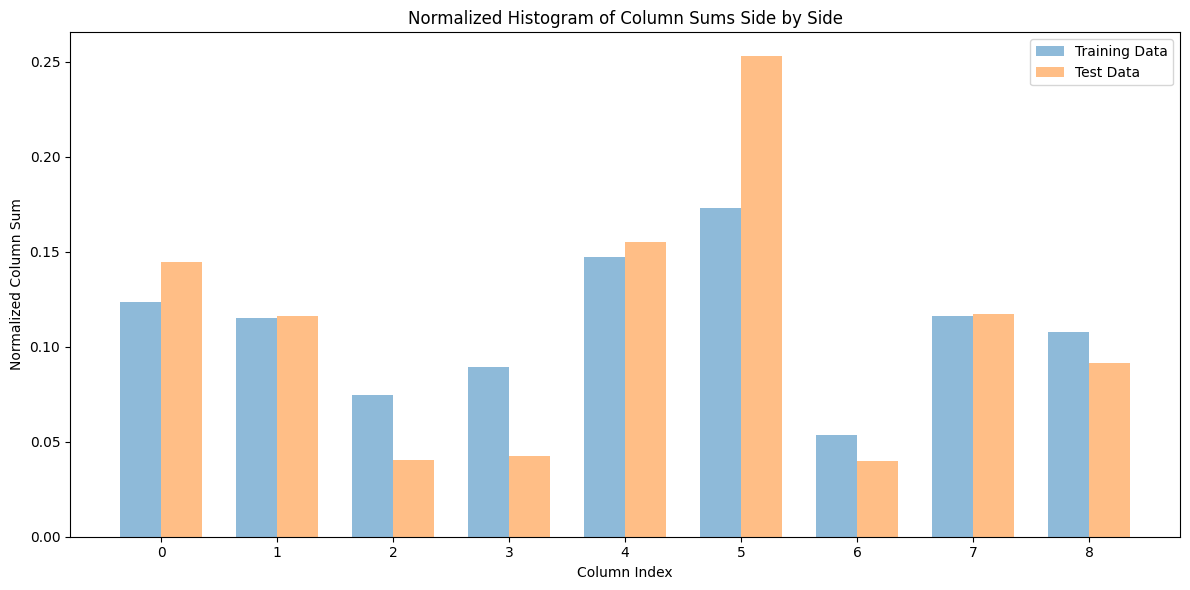

[245. 228. 148. 177. 292. 343. 106. 231. 214.]
[201. 161.  56.  59. 215. 351.  55. 163. 127.]
[0 1 2 3 4 5 6 7 8]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]] [[0. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [121]:
plot_cluster_counts_array(y_test, y_pred_optimized)

print(np.sum(y_test, axis=0))
print(np.sum(y_pred_optimized, axis=0))
print(np.array([0,1,2,3,4,5,6,7,8]))

m_rf_optimized.get_params()

print(y_test, y_pred_optimized)

### Optimization and model training (manual expert)

In [98]:
y = labels_manual_expert
X = fingerprint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [ ]:
best_params_grid_manual = optimize_rfc_grid_search(X_train, y_train)

In [102]:
m_rf_manual_optimized = RandomForestClassifier(n_estimators = int(best_params_grid_manual["n_estimators"]), max_depth = int(best_params_grid_manual["max_depth"]), max_leaf_nodes = int(best_params_grid_manual["max_leaf_nodes"]), min_samples_split = int(best_params_grid_manual["min_samples_split"]), max_features = int(best_params_grid_manual["max_features"])).fit(X_train, y_train)
y_pred = m_rf_manual_optimized.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.68      0.38      0.48       181
           1       0.86      0.69      0.76       369
           2       0.63      0.37      0.46       134
           3       0.65      0.51      0.57       212
           4       1.00      0.11      0.20         9
           5       0.52      0.15      0.23       117
           6       0.00      0.00      0.00         5
           7       0.25      0.07      0.11        28
           8       0.86      0.23      0.36        53
           9       0.80      0.12      0.21        34
          10       0.17      0.05      0.08        41

   micro avg       0.73      0.44      0.55      1183
   macro avg       0.58      0.24      0.31      1183
weighted avg       0.69      0.44      0.52      1183
 samples avg       0.54      0.43      0.45      1183



## Feature importance

In [122]:
def feature_importance(model, X_train):

    # Extract feature importances
    feature_importances = model.feature_importances_

    # Create generic feature names if not already provided
    if hasattr(X_train, 'columns'):
        feature_names = X_train.columns
    else:
        feature_names = [f"Bit {i}" for i in range(X_train_std.shape[1])]

    # Sort the feature importances in descending order and get the indices
    indices = np.argsort(feature_importances)[::-1]

    # Select the top 50 features
    top_indices = indices[:50]
    
    # Adjust the size of the plot to accommodate 50 features nicely
    plt.figure(figsize=(15, 10))
    plt.title("Top 50 Feature Importances")
    plt.bar(range(50), feature_importances[top_indices], color="r", align="center")
    
    # Set the ticks to be the names of the top 50 features
    plt.xticks(range(50), [feature_names[i] for i in top_indices], rotation=90)
    plt.xlim([-1, 50])
    plt.tight_layout()  # Adjust layout to not cut off labels
    plt.show()

### K-means

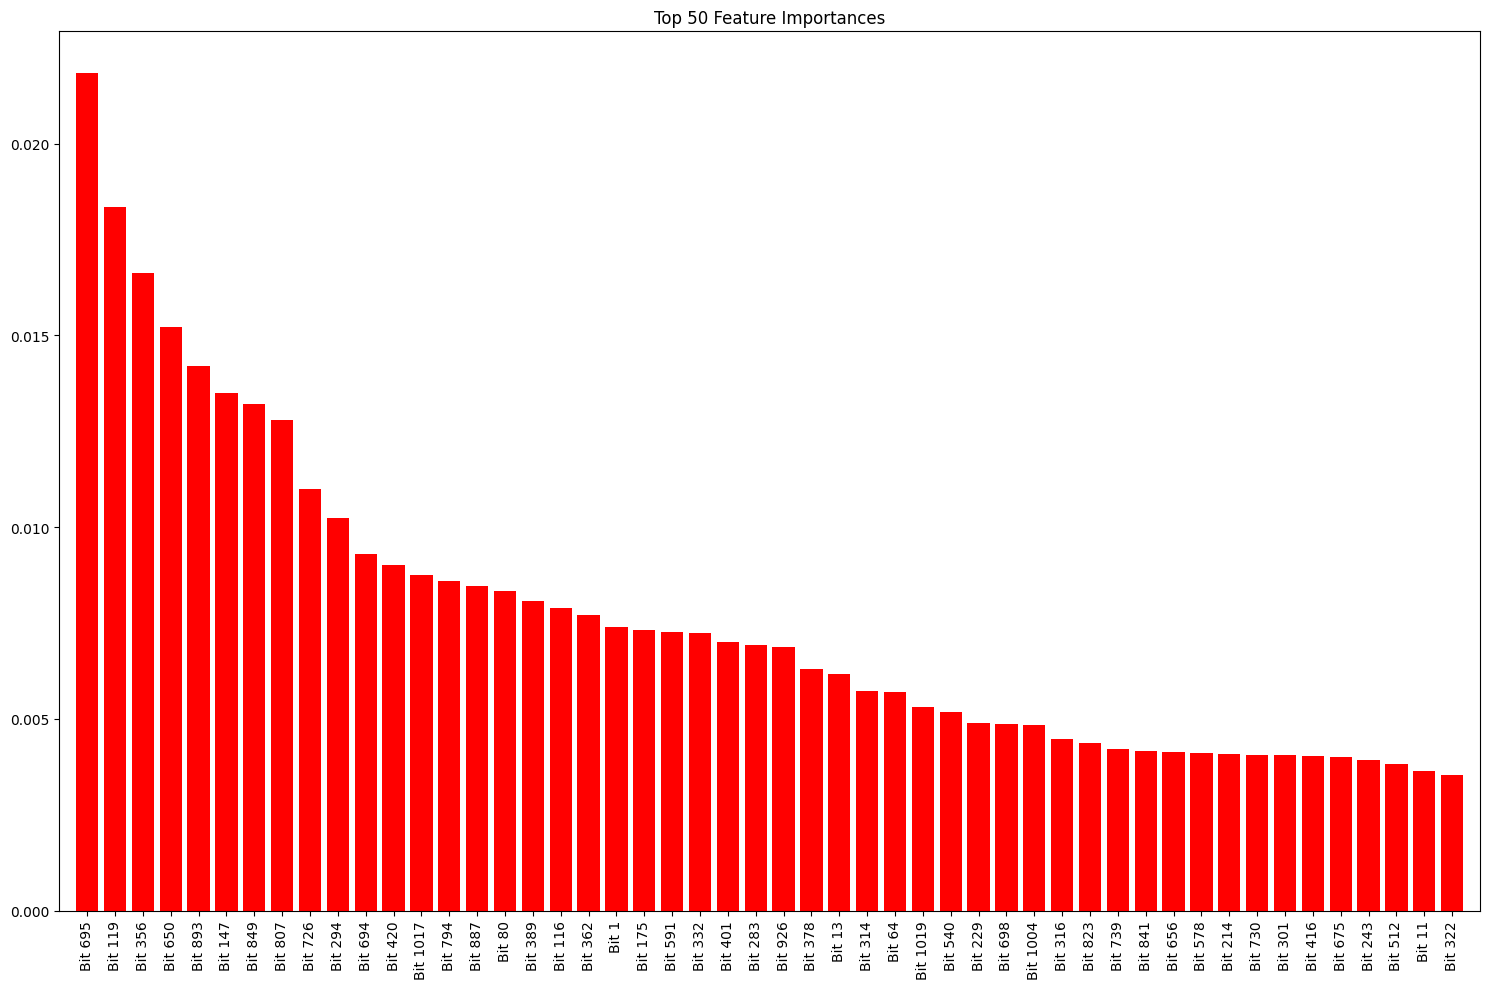

In [124]:
feature_importance(m_rf_kmeans_optimized, X_train)

### Manual Expert

In [ ]:
feature_importance(m_rf_manual_optimized)